# Bioinformática y Análisis Genómico
# 4º curso Grado en Bioquímica - Mención en Biotecnología
# Curso 2020/2021
## Práctica 5: Plegado de proteinas 2D
### Profesor: Ignacio Pérez Hurtado de Mendoza
### perezh@us.es
### http://www.cs.us.es/~ignacio

## Plegado de proteinas 2D

Los primeros modelos de plegamiento de proteínas (Shakhnovich & Gutin, 1993; Dill et al., 1995; Moreno-Hernandez & Levitt, 2012), usaron un alfabeto reducido en donde los aminoácidos son polares o hidrofóbicos y donde las cadenas se pliegan en una malla bidimensional. En general se acepta que estos modelos reproducen las características más importantes del proceso de plegamiento real con la ventaja de ser más manejables.

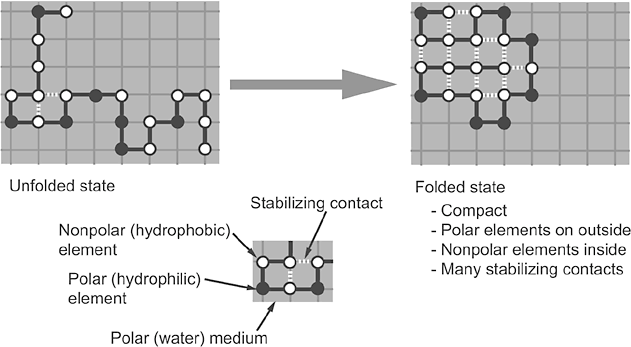


En esta práctica vamos a implementar un sencillo algoritmo de plegamiento de proteinas en 2D en base a la hidrofobicidad de los aminoácidos.

* Una proteina con información espacial vendrá definida por una tupla de dos cadenas de texto con la misma longitud. La primera cadena contendrá los símbolos de los aminoácidos de la proteina y la segunda cadena tendrá símbolos de entre {I,N,S,E,W} que representarán la estructura de la proteina mediante la posición relativa de cada aminoácido con respecto al anterior (Norte, Sur, Este, Oeste), el caracter I se reserva para el aminoácido inicial. Por ejemplo: ('PEPTIDE','IEENNWS') representa la siguiente estructura:

* Si hay solapamientos espaciales, la estructura es inválida, por ejemplo: ('PEPTIDE', 'IEENWWS').

* La estructura de la proteina se puntuará de acuerdo a la hidrofobicidad de los aminoácidos y los elementos adyacentes a cada aminoácido (más adelante se explica cómo).

* Se trata de un problema de optimización que se resolverá mediante el algoritmo *Simulating annealing*

## Ejercicio 1

Dada una proteina con información espacial, vamos a construir un diccionario que represente la información de una forma que nos facilite el análisis. Las claves de dicho diccionario serán tuplas de dos números enteros representando coordenadas espaciales y los valores serán letras de aminoácidos. El primer aminoácido siempre se colocará en las coordenadas (0,0) y los siguientes se colocarán según las posiciones relativas. Por ejemplo: La proteina ('PEPTIDE','IEENNWS') dará lugar al siguiente diccionario:

{(0,0): 'P', (1,0): 'E', (2,0): 'P', (2,1): 'T', (2,2): 'I',
 (1,2): 'D', (1,1): 'E'}
 
Se pide implementar una función **get_spatial_dic(protein, structure)** que recibe una cadena representando una proteina y otra cadena representando su estructura y devuelve el diccionario explicado anteriormente o un diccionario vacío si existen solapamientos. 
 


In [23]:
#def get_spatial_dic(protein,structure):
    #inicializo las posiciones y el dic
    #por cada letra de la proteina y la estructura... 
    #pista: mirar como se hace un for usando la funcion zip para agrupar dos elementos e iterarlos a la vez
        #modificar pos1 y pos2 según que letra haya en structure
        #Sí, hay que usar muchos if-elif
        #guardo pos1 y pos 2 en un objeto de clase tupla ()   
        #checkeo si la pos obtenida ya existe en el dic
            #si es así, devolver un dic vacío
        #si no, guardar la pos como clave y como valor el aminoacido en el dic
    #devolver dic
def get_spatial_dic(proteina,estructura):
    pos1=0
    pos2=0
    diccionario={}
    #letra = ["I","E","W","N","S"]
    for (aa, letra) in zip(proteina,estructura):
        if letra == "I":
            pos1 = 0
            pos2 = 0
        elif letra == "N":
            pos2 += 1
        elif letra == "S":
            pos2 -= 1
        elif letra == "E":
            pos1 += 1
        elif letra == "W":
            pos1 -= 1
        posicion = ( pos1,pos2 )
        if posicion in diccionario:
            return dict()
        else:
            diccionario[posicion] = aa        
    return diccionario

In [24]:
get_spatial_dic('PEPTIDE','IEENNWS')

{(0, 0): 'P',
 (1, 0): 'E',
 (2, 0): 'P',
 (2, 1): 'T',
 (2, 2): 'I',
 (1, 2): 'D',
 (1, 1): 'E'}

In [25]:
get_spatial_dic('PEPTIDE','IEENWWS')

{}

In [26]:
# Pruebas
print(get_spatial_dic('PEPTIDE','IEENNWS'))
print(get_spatial_dic('PEPTIDE','IEENWWS'))

{(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (1, 2): 'D', (1, 1): 'E'}
{}


## Ejercicio 2


Los aminoácidos se pueden clasificar en función de su solubilidad como:

* Hidrofílicos: aminoácidos polares y con tendencia a asociarse con el agua.

* Hidrofóbicos: aminoácidos apolares con tendencia a repeler el agua.

La solubilidad de los aminoácidos se mide calculando la variación de Energía Libre en contacto con agua a pH = 7.
 
Se define hidropatía como la variación de Energía Libre (ΔG) asociada a la transferencia del aminoácidos desde una solución orgánica a otra acuosa.

A continuación se facilita un diccionarios con los 20 aminoácidos  y sus correspondientes valores de la variación de Energía libre:

In [27]:
aa_deltaG = {
 'A': 1,    # Alanine
 'C': 0.17, # Cysteine
 'D': -3,   # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5,  # Phenylalanine
 'G': 0.67, # Glycine
 'H': -1.7, # Histidine
 'I': 3.1,  # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2,  # Leucine
 'M': 1.1,  # Methionine
 'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3,  # Valine
 'W': 1.5,  # Tryptophan
 'Y': 0.08  # Tyrosine
} 

### Ejercicio 2.1
Se pide implementar una función **is_hydrophobic(aa)** que recibe un aminoácido y devuelve **True** si su ΔG es mayor de -1.5, **False** en caso contrario.

In [28]:
def is_hydrophobic(aa):
    return aa_deltaG[aa] > -1.5


In [29]:
#pruebas
is_hydrophobic('A')
#True
is_hydrophobic('S')
#True
is_hydrophobic('R')
#False
is_hydrophobic('H')
#False

False

In [30]:
is_hydrophobic('A')

True

Cada aminoácido tiene 4 posiciones adyacentes (N,S,E,W), si alguna de esas posiciones no está ocupada por otro aminoácido, se entiende que es una posición libre ocupada por el medio acuoso. 

La puntuación de un aminoácido será:

* ΔG * N si el aminoácido no es hidrofóbico
* ΔG * N + 10 * N si el aminoácido es hidrofóbico

En dónde N es el número de posiciones adyacentes libres.

La puntuación de la proteina es el sumatorio de las puntuaciones de sus aminoácidos. Cuanto menor sea esta puntuación, más aminoácidos hidrofílicos se encontrarán en contacto con el medio. Intentaremos por tanto minimizar esta puntuación.


### Ejercicio 2.2
Se pide implementar una función **get_score(dic)** que reciba un diccionario representando la estructura espacial de una proteina y devuelva su puntuación.

In [31]:
def get_score(diccionario):
    aa = diccionario.values()
    pos = diccionario.keys()
    print(aa)
    print(pos)
    for pos in diccionario:
        n=0
        if pos not in diccionario:
            n += 1
        else:
            n = n
        print(n)
            
    for aa in diccionario:
        if is_hydrophobic(aa) == True:
            punt_aa = aa_deltaG[aa] * n
        elif is_hydrophobic(aa) == False:
            punt_aa = aa_deltaG[aa] * n + 10*n

In [32]:
get_score(get_spatial_dic('PEPTIDE','IEENNWS'))

dict_values(['P', 'E', 'P', 'T', 'I', 'D', 'E'])
dict_keys([(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (1, 1)])
0
0
0
0
0
0
0


KeyError: (0, 0)

In [38]:
def get_score_2(diccionario):
    score_total=0
    modificaciones=[(1,0),(-1,0),(0,1),(0,-1)]
    for (posx,posy) in diccionario:
        for (c,d) in modificaciones:
            if (posx+c,posy+d) not in diccionario:
                score_total +=aa_deltaG[diccionario[(posx,posy)]]
                if is_hydrophobic(diccionario[(posx,posy)]):
                    score_total += 10
    return score_total
                    

In [ ]:
# pruebas
get_score_2(get_spatial_dic('PEPTIDE','IEENNWS'))
# 72.80000000000001
#print(get_score(get_spatial_dic('PEPTIDE','IEEEEEE')))
# 74.25000000000001
#print(get_score(get_spatial_dic('PEPTIDE','IEENWWN')))
# 57.04

## Ejercicio 3

Dada una proteina y su estructura, podemos realizar un plegado en 90 o -90 grados a partir de la posición i de la siguiente forma:

* Si es 90 grados: Realizar las siguientes transformaciones en la estructura a partir de la posición i:
    - N -> W
    - S -> E
    - E -> N
    - W -> S
    

* Si es -90 grados: Realizar las siguientes transformaciones en la estructura a partir de la posición i:
    - N -> E
    - S -> W
    - E -> S
    - W -> N
    
Se pide implementar una función **fold(structure, pos, angle)** que recibe una estructura, una posición de plegado (empezando por 0) y el ángulo que puede ser 90 o -90, devuelve una nueva estructura tras aplicar el plegado.

*Nota*: No nos preocuparemos de si el resultado es válido


In [ ]:
#def fold(structure,pos,angle):
    #hago un diccionario con la transformacion de cada coordenada +90 y -90
      #si el angulo es 90 selecciono como current_dic al diccionario +90
      #si el angulo es -90 selecciono como current_dic al diccionario -90
    #inicializo una cadena de caracteres donde voy a guardar mi resultado
    #recorro desde la posicion 0 hasta la pos elegida para el pliegue
        #almaceno en resultado cada una de las coordenadas que hay en structure
    #recorro desde la posicion elegida para el pliegue hasta el final de la estructura
        #busco en el current_dic la coordenada de estructure transformada a al angulo nuevo
    #devuelvo resultado


In [ ]:
def fold(structure,pos,angle):
    dic_levógiro = {"N":"W", "S":"E", "E":"N", "W":"S"} ## +90
    dic_dextrógiro = {"N":"E", "S":"W", "E":"S", "W":"N"} ## -90
    if angle == 90:
        current_dic = dic_levógiro
    elif angle == -90:
        current_dic = dic_dextrógiro
    result = ""
    for letra in range(0,pos):
        result += structure[letra]
    for letra in range(pos,len(structure)):
        result += current_dic[structure[letra]]
    return result
    
    
    

In [39]:
def fold_2(structure,pos,angle):
    dic_levógiro = {"N":"W", "S":"E", "E":"N", "W":"S"} ## +90
    dic_dextrógiro = {"N":"E", "S":"W", "E":"S", "W":"N"} ## -90
    if angle == 90:
        current_dic = dic_levógiro
    elif angle == -90:
        current_dic = dic_dextrógiro
    result = ""
    for letra in structure[0:pos]:
        result += letra
    for letra in structure[pos:len(structure)]:
        result += current_dic[letra]
    return result
    
    
    

In [ ]:
fold('IEEEEEE' ,4 , 90)

In [ ]:
fold_2('IEEEEEE',4,-90)

In [ ]:
#pruebas
print(fold('IEEEEEE',4,90))
# IEEENNN

print(fold('IEEEEEE',4,-90))
# IEEESSS

print(fold('IEENNWS',4,-90))
# IEENENW

print(fold('IEENNWS',5,-90))
# IEENNNW

## Ejercicio 4

Se pide implementar una función **get_successors(protein,structure)** que dada una proteina y su estructura, devuelva una diccionario cuyas claves son las posibles estructuras **validas** tras aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios espaciales obtenidos con **get_spatial_dic**. Para obtener todos los posibles plegamientos se iterará la posición desde 1 hasta el final de la estructura y para cada posición se aplicarán los plegamientos en 90 y -90 grados, luego se comprobará si el diccionario espacial tiene datos (es válido) para añadirlo al resultado.

In [ ]:
#def get_successors(protein,structure):
    #Inicializo mi dic resultado vacio
    #recorro la estructura
        #recorro una lista con los angulos posibles [90,-90]
            #uso la funcion fold y doblo en esa posicion con cada uno de los angulos
            #uso la funcion get_spatial_dic que va a devolver las coordenadas o un dic vacio si la estructura no es posible
            #si el diccionario con las coordenadas no está vacío...
                #guardo en resultado ese diccionario con las coordenadas posibles para el plegamiento
                #OJO! resultado lo iniciamos como diccionario vacio, lo que queremos es rellenarlo
                #usando como claves las estructuras y como valores lo que devuelve get spatial dic de esa estructura
                #Ejemplo: {"ISSENNE":{(0, 0): 'P', (0, -1): 'E', (0, -2): 'P', (1, -2): 'T', (1, -1): 'I', (1, 0): 'D',(2, 0): 'E'},
                #          "INNWSSW": {(0, 0): 'P', (0, 1): 'E',(0, 2): 'P',(-1, 2): 'T',(-1, 1): 'I',(-1, 0): 'D',(-2, 0): 'E'}
                #es un diccionario con strings como claves y diccionarios como valores (no hay que hacer ninguna transformacion, es
                #una cosa comun y valida)
    #devuelve resultado



In [76]:
def get_successors(protein,structure):
    resultado = dict()
    for i in range(1,len(structure)):
        for angle in [90,-90]:
            print(angle)
            estructuras = fold_2(structure,i,angle)
            coord = get_spatial_dic(protein,estructuras)
            if coord != {}:
                resultado[estructuras]=coord
    return resultado

In [ ]:
get_successors('PEPTIDE','IEENWWN')

In [ ]:
#Pruebas
get_successors('PEPTIDE','IEENWWN')

#{'ISSENNE': {(0, 0): 'P',
#  (0, -1): 'E',
#  (0, -2): 'P',
#  (1, -2): 'T',
#  (1, -1): 'I',
#  (1, 0): 'D',
#  (2, 0): 'E'},
# 'INNWSSW': {(0, 0): 'P',
#  (0, 1): 'E',
#  (0, 2): 'P',
#  (-1, 2): 'T',
#  (-1, 1): 'I',
#  (-1, 0): 'D',
#  (-2, 0): 'E'},
# 'IESENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (1, -1): 'P',
#  (2, -1): 'T',
#  (2, 0): 'I',
#  (2, 1): 'D',
#  (3, 1): 'E'},
# 'IEEENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (3, 0): 'T',
#  (3, 1): 'I',
#  (3, 2): 'D',
#  (4, 2): 'E'},
# 'IEENNNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (2, 2): 'I',
#  (2, 3): 'D',
#  (3, 3): 'E'},
# 'IEENWNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',get_succesors
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (1, 2): 'D',
#  (2, 2): 'E'},
# 'IEENWWW': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (0, 1): 'D',
#  (-1, 1): 'E'}}

## Ejercicio 5

A continuación se presenta implementado el algoritmo de *Simulating Annealing* para resolver el problema del plegado 2D como un problema de optimización, analizar el código:

In [41]:
import random
from math import e
def simulating_annealing(protein, tInit = 100, factor = 0.95, 
                         nCoolings = 100, nIters = 100):
    temperature = tInit
    currentState = (protein, 'I'+'E'*(len(protein)-1))
    currentScore = get_score_2(get_spatial_dic(*currentState))
    bestState = currentState
    bestScore = currentScore
    for i in range(0,nCoolings):
        print('Temperature ',temperature,' Best score: ',bestScore)
        for j in range(0,nIters):
            candidate = fold_2(currentState[1],
                             random.randint(1,len(protein)),
                             -90+random.randint(0,1)*180)
            dic = get_spatial_dic(protein,candidate)
            while (len(dic)==0):
                candidate = fold_2(currentState[1],
                             random.randint(1,len(protein)),
                             -90+random.randint(0,1)*180)
                dic = get_spatial_dic(protein,candidate)
            candidateScore = get_score_2(dic)
            scoreDiff = candidateScore - currentScore
            if scoreDiff < 0:
                candidateProb = 1.0
            else:
                candidateProb = e**(-scoreDiff/temperature)
            if random.random()<candidateProb:
                currentState = (protein,candidate)
                currentScore = candidateScore
                if currentScore < bestScore:
                    bestState = currentState
                    bestScore = currentScore
        temperature*= factor
    return bestState     
    
    

In [ ]:

# La siguiente secuencia se corresponde con el receptor olfativo
# de Homo Sapiens, siendo una proteina transmembranal
# Accesion Number Uniprot: Q8NHC7
#mirar como sacar seq de uniprot
Q8NHC7='MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV'

result = simulating_annealing(Q8NHC7,100,0.99,500,500)


In [ ]:
#vemos que se trata de una tupla con dos elementos, la sequencia y la estructura
result

In [ ]:

result= ('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV', 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES' )
result

In [ ]:
#importamos paquete de representación grafica: pyplot
from matplotlib import pyplot
#Comentamos estas pruebas en clase
pyplot.plot([1,5,3,7,5])

In [ ]:
pyplot.plot(["b","a","c","e","t"], [15,30,68,94,45],'o-', color="green")
pyplot.plot(["b","a","c","e","t"], [20,40,50,90,25],'o-')
pyplot.plot(["b","a","c","e","t"], [10,12,15,36,18],'o-', color="red")
pyplot.plot(["b","a","c","e","t"], [55,42,60,135,67],'o-', color="purple")


[(0, 0), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (-2, -1), (-2, 0), (-2, 1), (-3, 1), (-3, 0), (-3, -1), (-4, -1), (-4, -2), (-4, -3), (-3, -3), (-3, -2), (-2, -2), (-2, -3), (-1, -3), (-1, -2), (0, -2), (0, -1), (1, -1), (1, -2), (1, -3), (0, -3), (0, -4), (-1, -4), (-2, -4), (-3, -4), (-4, -4), (-5, -4), (-5, -3), (-6, -3), (-6, -2), (-5, -2), (-5, -1), (-6, -1), (-7, -1), (-7, 0), (-8, 0), (-8, -1), (-9, -1), (-9, -2), (-8, -2), (-7, -2), (-7, -3), (-7, -4), (-6, -4), (-6, -5), (-5, -5), (-4, -5), (-3, -5), (-3, -6), (-2, -6), (-2, -7), (-3, -7), (-3, -8), (-2, -8), (-2, -9), (-3, -9), (-3, -10), (-4, -10), (-4, -9), (-4, -8), (-4, -7), (-4, -6), (-5, -6), (-6, -6), (-7, -6), (-7, -7), (-7, -8), (-7, -9), (-6, -9), (-6, -8), (-5, -8), (-5, -9), (-5, -10), (-5, -11), (-6, -11), (-6, -10), (-7, -10), (-8, -10), (-8, -9), (-8, -8), (-8, -7), (-9, -7), (-9, -8), (-10, -8), (-10, -9), (-9, -9), (-9, -10), (-10, -10), (-10, -11), (-9, -11), (-8, -11), (-8, -12), (-9, -12), (-1

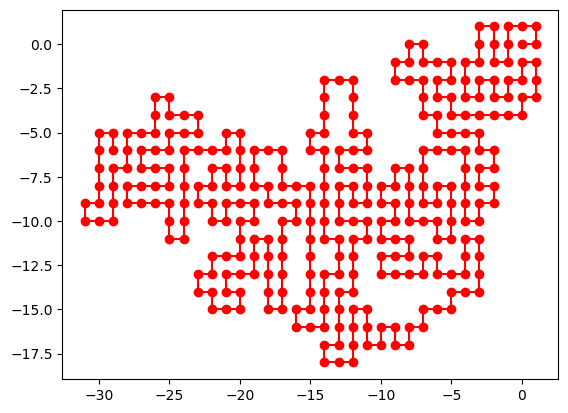

In [93]:
####### Hacemos la representación de la proteína
result= ('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV', 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES' )

dic_coordenadas = get_spatial_dic(result[0], result[1])
coordenadas = list(dic_coordenadas.keys())
print(coordenadas)

def plot_data(coordenadas):
    xlist=[]
    ylist=[]
    for (xpos,ypos) in coordenadas:
        xlist.append(xpos)
        ylist.append(ypos)
    return(xlist,ylist)

data = plot_data(coordenadas)
pyplot.plot(data[0],data[1],'o-', color="red")


    

In [42]:
#Lo probramos con otra proteina, por ejemplo insulina

# Accesion Number Uniprot: P01308
P01308 ="MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"

result = simulating_annealing(P01308,100,0.99,500,500)

Temperature  100  Best score:  1590.980000000001
Temperature  99.0  Best score:  1051.539999999999
Temperature  98.01  Best score:  962.7199999999997
Temperature  97.0299  Best score:  962.7199999999997
Temperature  96.059601  Best score:  962.7199999999997
Temperature  95.09900499  Best score:  962.7199999999997
Temperature  94.1480149401  Best score:  962.7199999999997
Temperature  93.206534790699  Best score:  845.4199999999996
Temperature  92.27446944279201  Best score:  845.4199999999996
Temperature  91.35172474836409  Best score:  845.4199999999996
Temperature  90.43820750088045  Best score:  845.4199999999996
Temperature  89.53382542587164  Best score:  845.4199999999996
Temperature  88.63848717161292  Best score:  845.4199999999996
Temperature  87.75210229989679  Best score:  845.4199999999996
Temperature  86.87458127689783  Best score:  845.4199999999996
Temperature  86.00583546412885  Best score:  845.4199999999996
Temperature  85.14577710948755  Best score:  845.419999999999

Temperature  26.536624974770554  Best score:  609.8699999999998
Temperature  26.271258725022847  Best score:  609.8699999999998
Temperature  26.00854613777262  Best score:  609.8699999999998
Temperature  25.748460676394892  Best score:  609.8699999999998
Temperature  25.490976069630943  Best score:  609.8699999999998
Temperature  25.23606630893463  Best score:  609.8699999999998
Temperature  24.983705645845284  Best score:  609.8699999999998
Temperature  24.73386858938683  Best score:  527.3899999999998
Temperature  24.48652990349296  Best score:  527.3899999999998
Temperature  24.24166460445803  Best score:  527.3899999999998
Temperature  23.99924795841345  Best score:  527.3899999999998
Temperature  23.759255478829314  Best score:  527.3899999999998
Temperature  23.52166292404102  Best score:  527.3899999999998
Temperature  23.28644629480061  Best score:  527.3899999999998
Temperature  23.053581831852604  Best score:  527.3899999999998
Temperature  22.82304601353408  Best score:  527

Temperature  5.8765830279503275  Best score:  440.9
Temperature  5.817817197670824  Best score:  440.9
Temperature  5.759639025694116  Best score:  440.9
Temperature  5.7020426354371745  Best score:  440.9
Temperature  5.645022209082803  Best score:  440.9
Temperature  5.588571986991974  Best score:  440.9
Temperature  5.532686267122054  Best score:  440.9
Temperature  5.477359404450834  Best score:  440.9
Temperature  5.422585810406325  Best score:  440.9
Temperature  5.368359952302262  Best score:  440.9
Temperature  5.314676352779239  Best score:  440.9
Temperature  5.261529589251447  Best score:  440.9
Temperature  5.208914293358933  Best score:  440.9
Temperature  5.156825150425344  Best score:  440.9
Temperature  5.10525689892109  Best score:  440.9
Temperature  5.0542043299318795  Best score:  440.9
Temperature  5.003662286632561  Best score:  440.9
Temperature  4.953625663766235  Best score:  440.9
Temperature  4.9040894071285726  Best score:  440.9
Temperature  4.8550485130572

Temperature  1.1769445769190738  Best score:  440.9
Temperature  1.165175131149883  Best score:  440.9
Temperature  1.1535233798383842  Best score:  440.9
Temperature  1.1419881460400003  Best score:  440.9
Temperature  1.1305682645796002  Best score:  440.9
Temperature  1.1192625819338042  Best score:  440.9
Temperature  1.1080699561144662  Best score:  440.9
Temperature  1.0969892565533215  Best score:  440.9
Temperature  1.0860193639877882  Best score:  440.9
Temperature  1.0751591703479102  Best score:  440.9
Temperature  1.0644075786444311  Best score:  440.9
Temperature  1.0537635028579868  Best score:  440.9
Temperature  1.0432258678294068  Best score:  440.9
Temperature  1.0327936091511127  Best score:  440.9
Temperature  1.0224656730596016  Best score:  440.9
Temperature  1.0122410163290056  Best score:  440.9
Temperature  1.0021186061657157  Best score:  440.9
Temperature  0.9920974201040585  Best score:  440.9
Temperature  0.982176445903018  Best score:  440.9
Temperature  0

('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV', 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES')
[(0, 0), (1, 0), (1, -1), (0, -1), (0, -2), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (0, 2), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 2), (2, 1), (2, 0), (2, -1), (2, -2), (3, -2), (3, -1), (3, 0), (3, 1), (4, 1), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (4, 3), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (-1, 3), (-2, 3), (-3, 3), (-4, 

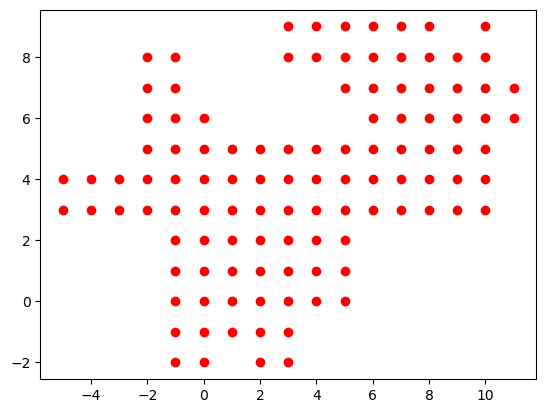

In [103]:
print(result)
dic_coordenadas_ins = get_spatial_dic(result_insulina[0], result_insulina[1])
coordenadas_ins = list(dic_coordenadas_ins.keys())
print(coordenadas_ins)

data_ins = plot_data(coordenadas_ins)
pyplot.plot(data_ins[0],data_ins[1],'o', color="red")


In [50]:
#Lo probramos con otra proteina, por ejemplo insulina

# Accesion Number Uniprot: P01308
P19367 ="MIAAQLLAYYFTELKDDQVKKIDKYLYAMRLSDETLIDIMTRFRKEMKNGLSRDFNPTATVKMLPTFVRSIPDGSEKGDFIALDLGGSSFRILRVQVNHEKNQNVHMESEVYDTPENIVHGSGSQLFDHVAECLGDFMEKRKIKDKKLPVGFTFSFPCQQSKIDEAILITWTKRFKASGVEGADVVKLLNKAIKKRGDYDANIVAVVNDTVGTMMTCGYDDQHCEVGLIIGTGTNACYMEELRHIDLVEGDEGRMCINTEWGAFGDDGSLEDIRTEFDREIDRGSLNPGKQLFEKMVSGMYLGELVRLILVKMAKEGLLFEGRITPELLTRGKFNTSDVSAIEKNKEGLHNAKEILTRLGVEPSDDDCVSVQHVCTIVSFRSANLVAATLGAILNRLRDNKGTPRLRTTVGVDGSLYKTHPQYSRRFHKTLRRLVPDSDVRFLLSESGSGKGAAMVTAVAYRLAEQHRQIEETLAHFHLTKDMLLEVKKRMRAEMELGLRKQTHNNAVVKMLPSFVRRTPDGTENGDFLALDLGGTNFRVLLVKIRSGKKRTVEMHNKIYAIPIEIMQGTGEELFDHIVSCISDFLDYMGIKGPRMPLGFTFSFPCQQTSLDAGILITWTKGFKATDCVGHDVVTLLRDAIKRREEFDLDVVAVVNDTVGTMMTCAYEEPTCEVGLIVGTGSNACYMEEMKNVEMVEGDQGQMCINMEWGAFGDNGCLDDIRTHYDRLVDEYSLNAGKQRYEKMISGMYLGEIVRNILIDFTKKGFLFRGQISETLKTRGIFETKFLSQIESDRLALLQVRAILQQLGLNSTCDDSILVKTVCGVVSRRAAQLCGAGMAAVVDKIRENRGLDRLNVTVGVDGTLYKLHPHFSRIMHQTVKELSPKCNVSFLLSEDGSGKGAALITAVGVRLRTEASS"

result = simulating_annealing(P19367,100,0.90,500,100)

Temperature  100  Best score:  10664.300000000001
Temperature  90.0  Best score:  10306.94
Temperature  81.0  Best score:  9737.119999999997
Temperature  72.9  Best score:  9716.189999999999
Temperature  65.61000000000001  Best score:  9265.049999999992
Temperature  59.049000000000014  Best score:  9053.429999999993
Temperature  53.144100000000016  Best score:  8725.850000000002
Temperature  47.829690000000014  Best score:  8725.850000000002
Temperature  43.04672100000001  Best score:  8573.980000000012
Temperature  38.742048900000015  Best score:  8397.63000000001
Temperature  34.86784401000001  Best score:  8285.60000000001
Temperature  31.381059609000012  Best score:  7954.750000000009
Temperature  28.242953648100013  Best score:  7811.4000000000115
Temperature  25.41865828329001  Best score:  7626.060000000014
Temperature  22.87679245496101  Best score:  7327.820000000007
Temperature  20.58911320946491  Best score:  7179.020000000008
Temperature  18.53020188851842  Best score:  712

Temperature  0.00013900845237714516  Best score:  5134.360000000006
Temperature  0.00012510760713943064  Best score:  5134.360000000006
Temperature  0.00011259684642548758  Best score:  5134.360000000006
Temperature  0.00010133716178293882  Best score:  5134.360000000006
Temperature  9.120344560464494e-05  Best score:  5134.360000000006
Temperature  8.208310104418045e-05  Best score:  5134.360000000006
Temperature  7.38747909397624e-05  Best score:  5134.360000000006
Temperature  6.648731184578616e-05  Best score:  5134.360000000006
Temperature  5.9838580661207544e-05  Best score:  5134.360000000006
Temperature  5.385472259508679e-05  Best score:  5134.360000000006
Temperature  4.846925033557811e-05  Best score:  5134.360000000006
Temperature  4.36223253020203e-05  Best score:  5134.360000000006
Temperature  3.926009277181828e-05  Best score:  5134.360000000006
Temperature  3.533408349463645e-05  Best score:  5134.360000000006
Temperature  3.18006751451728e-05  Best score:  5134.360000

Temperature  3.636029179587012e-10  Best score:  5134.360000000006
Temperature  3.272426261628311e-10  Best score:  5134.360000000006
Temperature  2.9451836354654796e-10  Best score:  5134.360000000006
Temperature  2.6506652719189315e-10  Best score:  5134.360000000006
Temperature  2.3855987447270386e-10  Best score:  5134.360000000006
Temperature  2.1470388702543347e-10  Best score:  5134.360000000006
Temperature  1.9323349832289014e-10  Best score:  5134.360000000006
Temperature  1.7391014849060114e-10  Best score:  5134.360000000006
Temperature  1.5651913364154102e-10  Best score:  5134.360000000006
Temperature  1.4086722027738693e-10  Best score:  5134.360000000006
Temperature  1.2678049824964824e-10  Best score:  5134.360000000006
Temperature  1.1410244842468342e-10  Best score:  5134.360000000006
Temperature  1.0269220358221508e-10  Best score:  5134.360000000006
Temperature  9.242298322399357e-11  Best score:  5134.360000000006
Temperature  8.318068490159422e-11  Best score:  51

Temperature  9.510722527101443e-16  Best score:  5134.360000000006
Temperature  8.559650274391299e-16  Best score:  5134.360000000006
Temperature  7.703685246952169e-16  Best score:  5134.360000000006
Temperature  6.933316722256952e-16  Best score:  5134.360000000006
Temperature  6.239985050031257e-16  Best score:  5134.360000000006
Temperature  5.615986545028132e-16  Best score:  5134.360000000006
Temperature  5.054387890525318e-16  Best score:  5134.360000000006
Temperature  4.548949101472786e-16  Best score:  5134.360000000006
Temperature  4.0940541913255077e-16  Best score:  5134.360000000006
Temperature  3.684648772192957e-16  Best score:  5134.360000000006
Temperature  3.3161838949736613e-16  Best score:  5134.360000000006
Temperature  2.984565505476295e-16  Best score:  5134.360000000006
Temperature  2.6861089549286656e-16  Best score:  5134.360000000006
Temperature  2.417498059435799e-16  Best score:  5134.360000000006
Temperature  2.1757482534922194e-16  Best score:  5134.3600

Temperature  2.4877094907634565e-21  Best score:  5134.360000000006
Temperature  2.238938541687111e-21  Best score:  5134.360000000006
Temperature  2.0150446875184e-21  Best score:  5134.360000000006
Temperature  1.81354021876656e-21  Best score:  5134.360000000006
Temperature  1.632186196889904e-21  Best score:  5134.360000000006
Temperature  1.4689675772009137e-21  Best score:  5134.360000000006


('MIAAQLLAYYFTELKDDQVKKIDKYLYAMRLSDETLIDIMTRFRKEMKNGLSRDFNPTATVKMLPTFVRSIPDGSEKGDFIALDLGGSSFRILRVQVNHEKNQNVHMESEVYDTPENIVHGSGSQLFDHVAECLGDFMEKRKIKDKKLPVGFTFSFPCQQSKIDEAILITWTKRFKASGVEGADVVKLLNKAIKKRGDYDANIVAVVNDTVGTMMTCGYDDQHCEVGLIIGTGTNACYMEELRHIDLVEGDEGRMCINTEWGAFGDDGSLEDIRTEFDREIDRGSLNPGKQLFEKMVSGMYLGELVRLILVKMAKEGLLFEGRITPELLTRGKFNTSDVSAIEKNKEGLHNAKEILTRLGVEPSDDDCVSVQHVCTIVSFRSANLVAATLGAILNRLRDNKGTPRLRTTVGVDGSLYKTHPQYSRRFHKTLRRLVPDSDVRFLLSESGSGKGAAMVTAVAYRLAEQHRQIEETLAHFHLTKDMLLEVKKRMRAEMELGLRKQTHNNAVVKMLPSFVRRTPDGTENGDFLALDLGGTNFRVLLVKIRSGKKRTVEMHNKIYAIPIEIMQGTGEELFDHIVSCISDFLDYMGIKGPRMPLGFTFSFPCQQTSLDAGILITWTKGFKATDCVGHDVVTLLRDAIKRREEFDLDVVAVVNDTVGTMMTCAYEEPTCEVGLIVGTGSNACYMEEMKNVEMVEGDQGQMCINMEWGAFGDNGCLDDIRTHYDRLVDEYSLNAGKQRYEKMISGMYLGEIVRNILIDFTKKGFLFRGQISETLKTRGIFETKFLSQIESDRLALLQVRAILQQLGLNSTCDDSILVKTVCGVVSRRAAQLCGAGMAAVVDKIRENRGLDRLNVTVGVDGTLYKLHPHFSRIMHQTVKELSPKCNVSFLLSEDGSGKGAALITAVGVRLRTEASS', 'IENNWSWSSWSWSWWSEESWSEEEENNENNEESENNNWWNNNESEEEEESSWWWSEEESWSEESSSENNNEENENNE

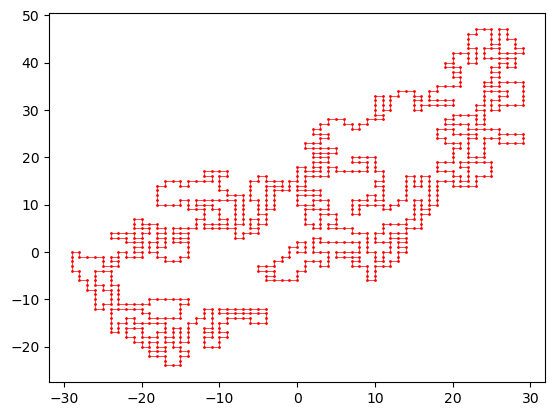

In [67]:
print(result)
dic_coordenadas_hexoquinasa = get_spatial_dic(result[0], result[1])
coordenadas_hexoquinasa = list(dic_coordenadas_hexoquinasa.keys())
print(coordenadas_hexoquinasa)

data_hexoquinasa = plot_data(coordenadas_hexoquinasa)
pyplot.plot(data_hexoquinasa[0],data_hexoquinasa[1],'o-', color="red", markersize=1, linewidth=0.5)

In [69]:
#Representa de color rojo los aa hidrofóbicos y azules los hidrofílicos

def color_aa(secuencia):
    aas_rojos = []
    aas_azules = []
    #aa = secuencia[aa_deltaG[aa]]
    for aa in secuencia:
        if is_hydrophobic(aa):
            aas_rojos.append(aa)
        else:
            aas_azules.append(aa)
        
    return(aas_rojos,aas_azules)

def color_aa_azul(secuencia,estructura):
    #aas_azules = []
    aas_azules = {}
    #aa = secuencia[aa_deltaG[aa]]
    for aa in secuencia:
        if is_hydrophobic(aa):
            aas_rojos.append(aa)
        else:
            aas_azules.append(aa)
        
    return(aas_rojos,aas_azules)





In [71]:
print(result[0])
color_aa(result[0])

MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV


(['M',
  'P',
  'S',
  'T',
  'T',
  'V',
  'M',
  'F',
  'L',
  'L',
  'M',
  'F',
  'S',
  'V',
  'W',
  'T',
  'L',
  'I',
  'L',
  'S',
  'A',
  'S',
  'F',
  'F',
  'M',
  'L',
  'Y',
  'L',
  'V',
  'T',
  'L',
  'M',
  'G',
  'I',
  'L',
  'I',
  'V',
  'T',
  'V',
  'T',
  'T',
  'C',
  'S',
  'S',
  'L',
  'M',
  'P',
  'M',
  'Y',
  'F',
  'F',
  'L',
  'L',
  'S',
  'I',
  'L',
  'A',
  'C',
  'Y',
  'I',
  'S',
  'V',
  'T',
  'V',
  'P',
  'T',
  'S',
  'C',
  'V',
  'S',
  'L',
  'L',
  'S',
  'T',
  'T',
  'I',
  'S',
  'A',
  'G',
  'C',
  'V',
  'A',
  'V',
  'F',
  'L',
  'V',
  'V',
  'F',
  'F',
  'V',
  'Y',
  'V',
  'L',
  'L',
  'F',
  'L',
  'T',
  'I',
  'M',
  'A',
  'Y',
  'V',
  'A',
  'V',
  'C',
  'P',
  'L',
  'Y',
  'P',
  'V',
  'I',
  'V',
  'S',
  'I',
  'C',
  'I',
  'M',
  'T',
  'L',
  'A',
  'S',
  'L',
  'L',
  'S',
  'G',
  'L',
  'V',
  'Y',
  'A',
  'G',
  'M',
  'T',
  'G',
  'S',
  'T',
  'F',
  'L',
  'P',
  'F',
  'C',
  'S',
  'V',
  'I',

[(0, 0), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (-2, -1), (-2, 0), (-2, 1), (-3, 1), (-3, 0), (-3, -1), (-4, -1), (-4, -2), (-4, -3), (-3, -3), (-3, -2), (-2, -2), (-2, -3), (-1, -3), (-1, -2), (0, -2), (0, -1), (1, -1), (1, -2), (1, -3), (0, -3), (0, -4), (-1, -4), (-2, -4), (-3, -4), (-4, -4), (-5, -4), (-5, -3), (-6, -3), (-6, -2), (-5, -2), (-5, -1), (-6, -1), (-7, -1), (-7, 0), (-8, 0), (-8, -1), (-9, -1), (-9, -2), (-8, -2), (-7, -2), (-7, -3), (-7, -4), (-6, -4), (-6, -5), (-5, -5), (-4, -5), (-3, -5), (-3, -6), (-2, -6), (-2, -7), (-3, -7), (-3, -8), (-2, -8), (-2, -9), (-3, -9), (-3, -10), (-4, -10), (-4, -9), (-4, -8), (-4, -7), (-4, -6), (-5, -6), (-6, -6), (-7, -6), (-7, -7), (-7, -8), (-7, -9), (-6, -9), (-6, -8), (-5, -8), (-5, -9), (-5, -10), (-5, -11), (-6, -11), (-6, -10), (-7, -10), (-8, -10), (-8, -9), (-8, -8), (-8, -7), (-9, -7), (-9, -8), (-10, -8), (-10, -9), (-9, -9), (-9, -10), (-10, -10), (-10, -11), (-9, -11), (-8, -11), (-8, -12), (-9, -12), (-1

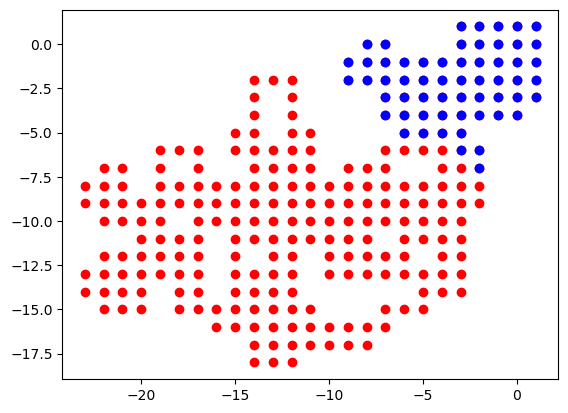

In [86]:
aas_separados_color = color_aa(result[0])
#print(aas_separados_color)
#print(aas_separados_color[1])

dic_coordenadas_rojos = get_spatial_dic(aas_separados_color[0], result[1])
#print(dic_coordenadas_rojos)
dic_coordenadas_azules = get_spatial_dic(aas_separados_color[1], result[1])
#print(dic_coordenadas_azules)

coordenadas_rojos = list(dic_coordenadas_rojos.keys())
coordenadas_azules = list(dic_coordenadas_azules.keys())
print(coordenadas_rojos)
print(coordenadas_azules)

def plot_data(coordenadas):
    xlist=[]
    ylist=[]
    for (xpos,ypos) in coordenadas:
        xlist.append(xpos)
        ylist.append(ypos)
    return(xlist,ylist)

data_rojos = plot_data(coordenadas_rojos)
data_azules = plot_data(coordenadas_azules)

pyplot.plot(data_rojos[0],data_rojos[1],'o', color="red")
pyplot.plot(data_azules[0],data_azules[1],'o', color="blue")

In [94]:
def find_hydro(secuencia, pos_data):
    hidrofo_x = []
    hidrofo_y = []
    hidrofi_x = []
    hidrofi_y = []
    xpos = pos_data[0]
    ypos = pos_data[1]
    for i in range(0,len(secuencia)):
        if is_hydrophobic(secuencia[i]):
            hidrofo_x.append(xpos[i])
            hidrofo_y.append(ypos[i])
        else:
            hidrofi_x.append(xpos[i])
            hidrofi_y.append(ypos[i])
    return([hidrofo_x,hidrofo_y], [hidrofi_x,hidrofi_y])

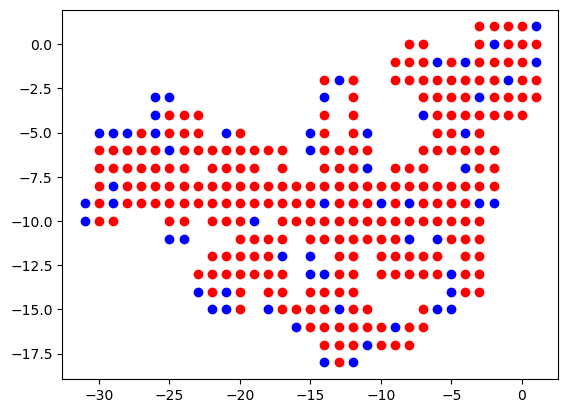

In [96]:
pos_data = plot_data(coordenadas)
res=find_hydro(result[0],pos_data)

hidrofo=res[0]
hidrofi=res[1]

pyplot.plot(hidrofi[0], hidrofi[1], 'o', color="blue")
pyplot.plot(hidrofo[0], hidrofo[1], 'o', color="red")

In [97]:
#Lo probramos con otra proteina, por ejemplo insulina

# Accesion Number Uniprot: P01308
P01308 ="MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"

result_insulina = simulating_annealing(P01308,100,0.99,500,500)

Temperature  100  Best score:  1590.980000000001
Temperature  99.0  Best score:  1001.7599999999994
Temperature  98.01  Best score:  997.4099999999995
Temperature  97.0299  Best score:  982.7799999999997
Temperature  96.059601  Best score:  982.7799999999997
Temperature  95.09900499  Best score:  982.7799999999997
Temperature  94.1480149401  Best score:  982.7799999999997
Temperature  93.206534790699  Best score:  982.7799999999997
Temperature  92.27446944279201  Best score:  982.7799999999997
Temperature  91.35172474836409  Best score:  982.7799999999997
Temperature  90.43820750088045  Best score:  982.7799999999997
Temperature  89.53382542587164  Best score:  982.7799999999997
Temperature  88.63848717161292  Best score:  982.7799999999997
Temperature  87.75210229989679  Best score:  982.7799999999997
Temperature  86.87458127689783  Best score:  982.7799999999997
Temperature  86.00583546412885  Best score:  982.7799999999997
Temperature  85.14577710948755  Best score:  963.16999999999

Temperature  26.00854613777262  Best score:  571.8799999999999
Temperature  25.748460676394892  Best score:  571.8799999999999
Temperature  25.490976069630943  Best score:  571.8799999999999
Temperature  25.23606630893463  Best score:  571.8799999999999
Temperature  24.983705645845284  Best score:  571.8799999999999
Temperature  24.73386858938683  Best score:  571.8799999999999
Temperature  24.48652990349296  Best score:  562.03
Temperature  24.24166460445803  Best score:  562.03
Temperature  23.99924795841345  Best score:  562.03
Temperature  23.759255478829314  Best score:  551.1599999999999
Temperature  23.52166292404102  Best score:  551.1599999999999
Temperature  23.28644629480061  Best score:  551.1599999999999
Temperature  23.053581831852604  Best score:  551.1599999999999
Temperature  22.82304601353408  Best score:  551.1599999999999
Temperature  22.59481555339874  Best score:  551.1599999999999
Temperature  22.36886739786475  Best score:  551.1599999999999
Temperature  22.1451

Temperature  6.3685904274894485  Best score:  259.43999999999994
Temperature  6.304904523214554  Best score:  259.43999999999994
Temperature  6.2418554779824085  Best score:  259.43999999999994
Temperature  6.1794369232025845  Best score:  259.43999999999994
Temperature  6.117642553970558  Best score:  259.43999999999994
Temperature  6.056466128430853  Best score:  259.43999999999994
Temperature  5.9959014671465445  Best score:  259.43999999999994
Temperature  5.935942452475079  Best score:  259.43999999999994
Temperature  5.8765830279503275  Best score:  259.43999999999994
Temperature  5.817817197670824  Best score:  259.43999999999994
Temperature  5.759639025694116  Best score:  259.43999999999994
Temperature  5.7020426354371745  Best score:  259.43999999999994
Temperature  5.645022209082803  Best score:  259.43999999999994
Temperature  5.588571986991974  Best score:  259.43999999999994
Temperature  5.532686267122054  Best score:  259.43999999999994
Temperature  5.477359404450834  Be

Temperature  1.7593337264871738  Best score:  259.43999999999994
Temperature  1.741740389222302  Best score:  259.43999999999994
Temperature  1.724322985330079  Best score:  259.43999999999994
Temperature  1.7070797554767783  Best score:  259.43999999999994
Temperature  1.6900089579220106  Best score:  259.43999999999994
Temperature  1.6731088683427904  Best score:  259.43999999999994
Temperature  1.6563777796593624  Best score:  259.43999999999994
Temperature  1.6398140018627687  Best score:  259.43999999999994
Temperature  1.623415861844141  Best score:  259.43999999999994
Temperature  1.6071817032256996  Best score:  259.43999999999994
Temperature  1.5911098861934427  Best score:  259.43999999999994
Temperature  1.5751987873315083  Best score:  259.43999999999994
Temperature  1.5594467994581933  Best score:  259.43999999999994
Temperature  1.5438523314636114  Best score:  259.43999999999994
Temperature  1.5284138081489753  Best score:  259.43999999999994
Temperature  1.5131296700674

[(0, 0), (1, 0), (1, -1), (0, -1), (0, -2), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (0, 2), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 2), (2, 1), (2, 0), (2, -1), (2, -2), (3, -2), (3, -1), (3, 0), (3, 1), (4, 1), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (4, 3), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (-1, 3), (-2, 3), (-3, 3), (-4, 3), (-5, 3), (-5, 4), (-4, 4), (-3, 4), (-2, 4), (-1, 4), (-1, 5), (-2, 5), (-2, 6), (-2, 7), (-2, 8), (-1, 8), (-1, 7), (-1, 6), (0, 6), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (5, 5), (6, 5), (7, 5), (7, 4), (6, 4), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (7, 7), (7, 6), (6, 6), (6, 7), (5, 7), (5, 8), (4, 8), (3, 8), (3, 9), (4, 9), (5, 9), (6, 9), (6, 8), (7, 8), (7, 9), (8, 9), (8, 8), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (10, 3), (10, 4), (10, 5), (10, 6), (11, 6), (11, 7), (10, 7), (10, 8), (10, 9)]


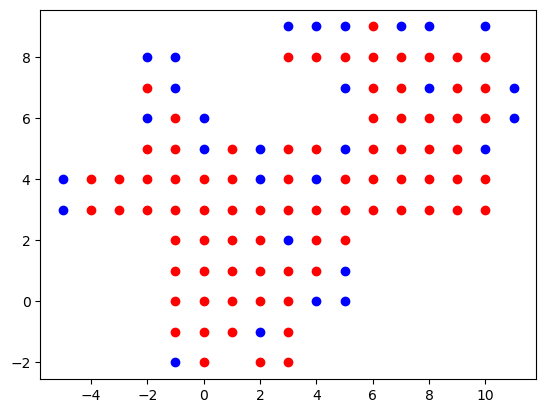

In [105]:
dic_coordenadas_ins = get_spatial_dic(result_insulina[0], result_insulina[1])
coordenadas_ins = list(dic_coordenadas_ins.keys())
print(coordenadas_ins)

pos_data_insulina = plot_data(coordenadas_ins)
res_insulina=find_hydro(result_insulina[0],pos_data_insulina)

hidrofo_insulina=res_insulina[0]
hidrofi_insulina=res_insulina[1]

pyplot.plot(hidrofi_insulina[0], hidrofi_insulina[1], 'o', color="blue")
pyplot.plot(hidrofo_insulina[0], hidrofo_insulina[1], 'o', color="red")